In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import validation_utils
plt.style.use('ggplot')
print("OK")

OK


In [2]:
# load austin radar data for validation
scenario_name = "sfbay"
VALIDATION_dir = os.path.expanduser('~/Data/FREIGHT/' + scenario_name + '/validation/npmrds')
RUN_dir = os.path.expanduser('~/Data/FREIGHT/' + scenario_name + '/beam/runs/7days/2')
print('VALIDATION_dir: ' + VALIDATION_dir)
print('RUN_dir: ' + RUN_dir)
NPMRDS_data_file = 'sf_npmrds_data.csv'
LINKSTATS = "12.linkstats.csv.gz"
SF_NPMRDS_data = read_csv(VALIDATION_dir + NPMRDS_data_file, sep = ',')
# load BEAM output
modeled_vmt = read_csv(RUN_dir + LINKSTATS, low_memory=False)
model_network = read_csv(VALIDATION_dir + 'beam_network_npmrds_screenline.csv', low_memory=False)
print("OK")
SF_NPMRDS_data.head(5)
meter_to_mile = 0.000621371
percent_of_samples = 0.01
mps_to_mph = 2.23694

beam_npmrds_screeline_validation(RUN_dir + "/" + LINKSTATS, RUN_dir + '/output', percent_of_samples)

VALIDATION_dir: /Users/haitamlaarabi/Data/FREIGHT/sfbay/validation/npmrds/
RUN_dir: /Users/haitamlaarabi/Data/FREIGHT/sfbay/beam/runs/7days/2/
OK


Unnamed: 0   tmc_code   measurement_tstamp  speed  average_speed  \
0           1  105N13022  2018-10-01 06:00:00  16.25           13.0   
1           2  105N13022  2018-10-01 07:00:00  14.40           12.0   
2           3  105N13022  2018-10-01 08:00:00   9.54            9.0   
3           4  105N13022  2018-10-01 09:00:00  15.03           10.0   
4           5  105N13022  2018-10-01 10:00:00  29.47           10.0   

   reference_speed  travel_time_seconds  
0             38.0                13.25  
1             38.0                14.95  
2             38.0                22.57  
3             38.0                14.33  
4             38.0                 7.31

In [2]:
# load austin radar data for validation
scenario_name = "sfbay"
VALIDATION_dir = os.path.expanduser('~/Data/FREIGHT/' + scenario_name + '/validation/npmrds/')
RUN_dir = os.path.expanduser('~/Data/FREIGHT/' + scenario_name + '/beam/runs/7days/2/')
print('VALIDATION_dir: ' + VALIDATION_dir)
print('RUN_dir: ' + RUN_dir)
NPMRDS_data_file = 'sf_npmrds_data.csv'
LINKSTATS = "12.linkstats.csv.gz"
SF_NPMRDS_data = read_csv(VALIDATION_dir + NPMRDS_data_file, sep = ',')
# load BEAM output
modeled_vmt = read_csv(RUN_dir + LINKSTATS, low_memory=False)
model_network = read_csv(VALIDATION_dir + 'beam_network_npmrds_screenline.csv', low_memory=False)
print("OK")
SF_NPMRDS_data.head(5)

VALIDATION_dir: /Users/haitamlaarabi/Data/FREIGHT/sfbay/validation/npmrds/
RUN_dir: /Users/haitamlaarabi/Data/FREIGHT/sfbay/beam/runs/7days/2/
OK


Unnamed: 0   tmc_code   measurement_tstamp  speed  average_speed  \
0           1  105N13022  2018-10-01 06:00:00  16.25           13.0   
1           2  105N13022  2018-10-01 07:00:00  14.40           12.0   
2           3  105N13022  2018-10-01 08:00:00   9.54            9.0   
3           4  105N13022  2018-10-01 09:00:00  15.03           10.0   
4           5  105N13022  2018-10-01 10:00:00  29.47           10.0   

   reference_speed  travel_time_seconds  
0             38.0                13.25  
1             38.0                14.95  
2             38.0                22.57  
3             38.0                14.33  
4             38.0                 7.31

In [3]:
# select observed data for validation
list_of_tmcs = model_network.loc[:, 'Tmc'].unique()
SF_NPMRDS_data = SF_NPMRDS_data.loc[SF_NPMRDS_data['tmc_code'].isin(list_of_tmcs)]
SF_NPMRDS_data.loc[:, 'formatted_time'] =pd.to_datetime(SF_NPMRDS_data.loc[:, 'measurement_tstamp'], 
                                                                        format="%Y-%m-%d %H:%M:%S")
SF_NPMRDS_data.loc[:, 'weekday'] = SF_NPMRDS_data.loc[:, 'formatted_time'].dt.weekday
SF_NPMRDS_data.loc[:, 'hour'] = SF_NPMRDS_data.loc[:, 'formatted_time'].dt.hour
SF_NPMRDS_data = SF_NPMRDS_data.loc[SF_NPMRDS_data['weekday'] == 1]

SF_NPMRDS_data.loc[SF_NPMRDS_data['speed']>= 80, 'speed'] = 80

# austin_NPMRDS_data_hourly_volume = austin_NPMRDS_data.groupby(['tmc_code', 'hour'])[['flow_per_lane']].mean()
# austin_NPMRDS_data_hourly_volume.columns = ['Volume (veh/lane/hour)']
# austin_NPMRDS_data_hourly_volume = austin_NPMRDS_data_hourly_volume.reset_index()
SF_NPMRDS_data_hourly_speed = SF_NPMRDS_data.groupby(['tmc_code', 'hour'])[['speed']].mean()
SF_NPMRDS_data_hourly_speed = SF_NPMRDS_data_hourly_speed.reset_index()
SF_NPMRDS_data_hourly_speed.columns = ['Tmc', 'hour', 'Avg.Speed (mph)']

# SF_NPMRDS_data_hourly_speed = pd.merge(austin_NPMRDS_data_hourly_volume,
#                                          austin_NPMRDS_data_hourly_speed,
#                                          on = ['Tmc', 'hour'], how = 'left')
print("OK")
SF_NPMRDS_data_hourly_speed.head(10)

OK


Tmc  hour  Avg.Speed (mph)
0  105+04098     0           48.000
1  105+04098     1           54.000
2  105+04098     2           53.200
3  105+04098     3           56.930
4  105+04098     4           55.000
5  105+04098     5           48.998
6  105+04098     6           40.226
7  105+04098     7           35.758
8  105+04098     8           34.950
9  105+04098     9           37.138

/var/folders/6j/kgqvb_h17tx6qkhp71prd9jr0000gq/T/ipykernel_76989/3790039892.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data = SF_NPMRDS_data_hourly_speed, x = "hour", y = "Avg.Speed (mph)", ci=95)


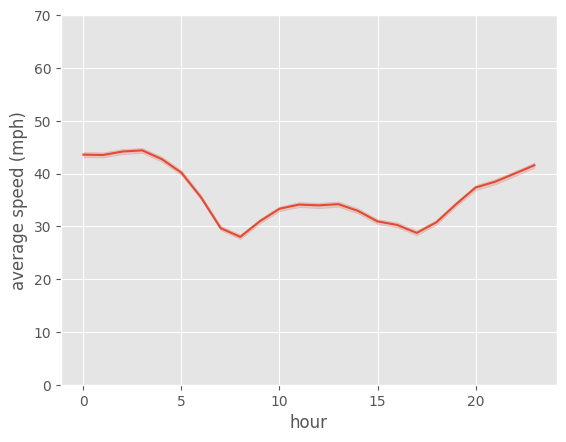

In [4]:
sns.lineplot(data = SF_NPMRDS_data_hourly_speed, x = "hour", y = "Avg.Speed (mph)", ci=95)
plt.ylim([0, 70])
plt.ylabel('average speed (mph)')
plt.savefig(RUN_dir + 'output/NPMRDS_hourly_mean_speed.png', bbox_inches='tight', dpi = 300)
plt.show()

In [5]:
meter_to_mile = 0.000621371
percent_of_samples = 0.01
mps_to_mph = 2.23694
model_network = model_network.drop_duplicates(subset=['linkId'])
model_network.head(5)

modeled_roadtype_lookup = {'tertiary': 'Minor collector',
                           'trunk_link': 'Freeway and major arterial',
                           'residential': 'Local',
                           'track': 'Local',
                           'footway': 'Local',
                           'motorway': 'Freeway and major arterial',
                           'secondary': 'Major collector',
                           'unclassified': 'Local',
                           'path': 'Local',
                           'secondary_link': 'Major collector',
                           'primary': 'Minor arterial',
                           'motorway_link': 'Freeway and major arterial',
                           'primary_link': 'Minor arterial',
                           'trunk': 'Freeway and major arterial',
                           'pedestrian': 'Local',
                           'tertiary_link': 'Minor collector',
                           'cycleway': 'Local',
                           np.nan: 'Local',
                           'steps': 'Local',
                           'living_street': 'Local', 
                           'bus_stop': 'Local',
                           'corridor': 'Local', 
                           'road': 'Local',
                           'bridleway': 'Local'}

model_network.loc[:, 'road_class'] = model_network.loc[:, 'attributeOrigType'].map(modeled_roadtype_lookup)
tmc_county_lookup = model_network.loc[:, ['NAME', 'Tmc', 'road_class']]
tmc_county_lookup = tmc_county_lookup.drop_duplicates(subset=['Tmc'])
print("OK")

OK


In [6]:
# filter modeled network
hourly_vol_to_check = modeled_vmt.groupby('hour')[['volume']].sum()
print(hourly_vol_to_check)
model_vmt_24_hour = modeled_vmt.loc[(modeled_vmt['hour'] <= 28) & (modeled_vmt['hour'] >= 5)]
model_vmt_24_hour.loc[model_vmt_24_hour['hour']>=24, 'hour'] -= 24
model_network.loc[:, 'fromNodeId'] = model_network.loc[:, 'fromNodeId'].astype(int)
model_network.loc[:, 'toNodeId'] = model_network.loc[:, 'toNodeId'].astype(int)
model_vmt_24_hour = pd.merge(model_vmt_24_hour, model_network, 
                                 left_on = ['link', 'from', 'to'],
                                 right_on = ['linkId', 'fromNodeId', 'toNodeId'], how = 'inner')
print("OK")
model_vmt_24_hour.head(5)

         volume
hour           
0         201.0
1         340.0
2         155.0
3         451.0
4        3324.0
5     1571517.0
6     3702807.0
7     7160995.0
8     8764985.0
9     6125849.0
10    6102404.0
11    6189575.0
12    6452098.0
13    6778720.0
14    6655760.0
15    7171610.0
16    7610739.0
17    9074732.0
18    9486539.0
19    6533311.0
20    5095155.0
21    4780967.0
22    2722226.0
23    1939624.0
24     941396.0
25     636587.0
26     498087.0
27     425957.0
28     353399.0
29     322476.0
30     257544.0
31     221450.0
32     206507.0
33     172284.0
34     159399.0
35     172109.0
36     165605.0
37     138974.0
38     106595.0
39     117106.0
40     106708.0
41      71954.0
42      61059.0
43      69794.0
44      81351.0
45     104614.0
46     121888.0
47     131748.0
48     107939.0
49      99806.0
50     104124.0
51      98585.0
52      89482.0
53      77067.0
54      73820.0
55      77509.0
56      67676.0
57      70629.0
58      50090.0
59      39682.0


/var/folders/6j/kgqvb_h17tx6qkhp71prd9jr0000gq/T/ipykernel_76989/474890115.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  model_network.loc[:, 'fromNodeId'] = model_network.loc[:, 'fromNodeId'].astype(int)
/var/folders/6j/kgqvb_h17tx6qkhp71prd9jr0000gq/T/ipykernel_76989/474890115.py:7: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  model_network.loc[:, 'toNodeId'] = model_network.loc[:, 'toNodeId'].astype(int)


OK


link   from     to  hour   length  freespeed  capacity stat  volume  \
0  162250  22862  22863     5  287.486  26.822333    4400.0  AVG     8.0   
1  162250  22862  22863     6  287.486  26.822333    4400.0  AVG    15.0   
2  162250  22862  22863     7  287.486  26.822333    4400.0  AVG    50.0   
3  162250  22862  22863     8  287.486  26.822333    4400.0  AVG    78.0   
4  162250  22862  22863     9  287.486  26.822333    4400.0  AVG    51.0   

   TruckVolume  ...  attributeOrigType  fromNodeId  toNodeId  GEOID     NAME  \
0          2.0  ...          secondary       22862     22863   6001  Alameda   
1          1.0  ...          secondary       22862     22863   6001  Alameda   
2         14.0  ...          secondary       22862     22863   6001  Alameda   
3          4.0  ...          secondary       22862     22863   6001  Alameda   
4         19.0  ...          secondary       22862     22863   6001  Alameda   

         NAMELSAD  CLASSFP        Tmc dist_to_tmc       road_class  
0  Alameda County       H1  105+10758         0.0  Major collector  
1  Alameda County       H1  105+10758         0.0  Major collector  
2  Alameda County       H1  105+10758         0.0  Major collector  
3  Alameda County       H1  105+10758         0.0  Major collector  
4  Alameda County       H1  105+10758         0.0  Major collector  

[5 rows x 30 columns]

In [7]:
demand_scaling = 1/percent_of_samples
model_vmt_24_hour.loc[:, 'combined_volume'] = model_vmt_24_hour.loc[:, 'volume'] * demand_scaling + \
model_vmt_24_hour.loc[:, 'TruckVolume']  # activate this for freight runs
model_vmt_24_hour.loc[:, 'hourly volume'] = model_vmt_24_hour.loc[:, 'volume']/ \
model_vmt_24_hour.loc[:, 'numberOfLanes']
model_vmt_24_hour.loc[:, 'VMT'] = demand_scaling * meter_to_mile * \
model_vmt_24_hour.loc[:, 'linkLength'] * model_vmt_24_hour.loc[:, 'combined_volume']
# model_vmt_24_hour.loc[:, 'travel_time (hr)'] = model_vmt_24_hour.loc[:, 'linkLength'] /3600
model_vmt_24_hour.loc[:, 'speed'] = model_vmt_24_hour.loc[:, 'linkLength'] / model_vmt_24_hour.loc[:, 'traveltime'] 
model_vmt_24_hour.loc[:, 'speed (mph)'] = mps_to_mph * model_vmt_24_hour.loc[:, 'speed']
print("OK")

OK


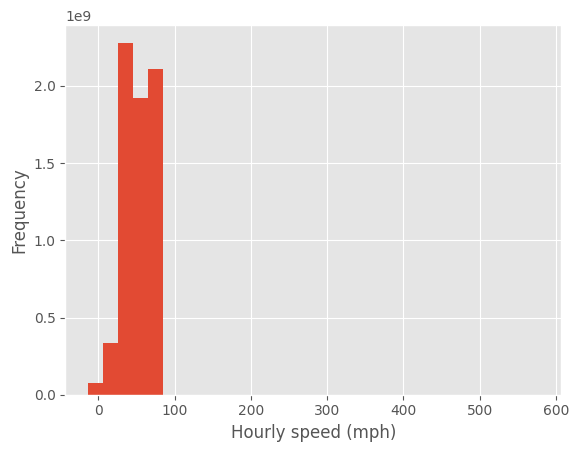

In [8]:
model_vmt_24_hour["speed (mph)"].plot(kind="hist", 
                                      weights=model_vmt_24_hour["combined_volume"], 
                                      bins = 30)
plt.xlabel('Hourly speed (mph)')
plt.savefig(RUN_dir + 'output/modeled_speed_distribution.png', dpi = 200)

/var/folders/6j/kgqvb_h17tx6qkhp71prd9jr0000gq/T/ipykernel_76989/1105810256.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x = 'hour', y = 'Avg.Speed (mph)', data = model_vmt_hour_data, ci = 95)


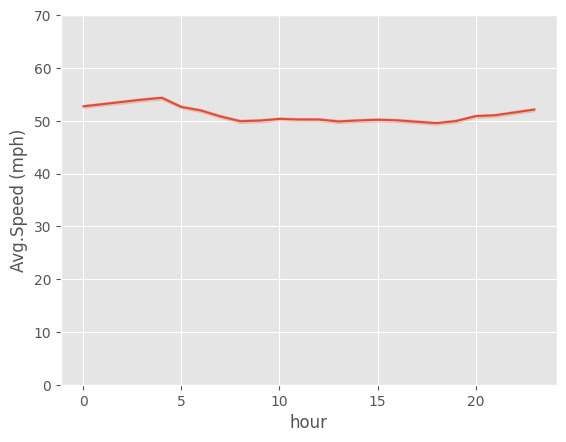

/var/folders/6j/kgqvb_h17tx6qkhp71prd9jr0000gq/T/ipykernel_76989/1105810256.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x = 'hour', y = 'Volume (veh/lane/hour)', data = model_vmt_hour_data, ci = 95)


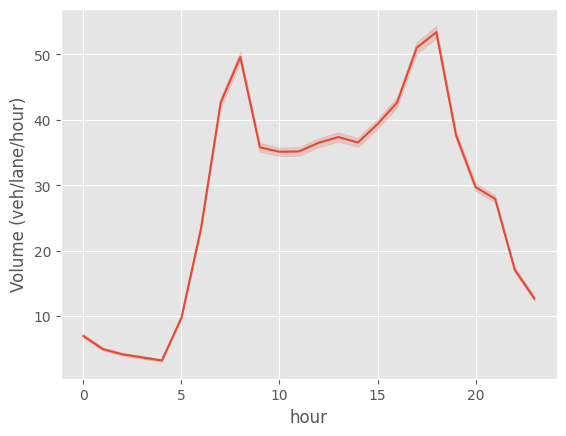

In [9]:
model_vmt_hour_volume = model_vmt_24_hour.groupby(['Tmc', 'hour'])[['hourly volume', 'VMT']].mean()
model_vmt_hour_volume = model_vmt_hour_volume.reset_index()
model_vmt_hour_volume.columns = ['Tmc', 'hour', 'Volume (veh/lane/hour)', 'VMT']
model_vmt_24_hour_filtered = model_vmt_24_hour.loc[model_vmt_24_hour['volume']>0]

model_vmt_hour_speed = model_vmt_24_hour_filtered.groupby(['Tmc', 'hour']).apply(lambda x: np.average(x.speed, weights=x.combined_volume))
model_vmt_hour_speed = model_vmt_hour_speed.reset_index()
model_vmt_hour_speed.columns = ['Tmc', 'hour', 'Avg.Speed (mph)'] 
model_vmt_hour_speed.loc[:, 'Avg.Speed (mph)'] *= mps_to_mph

model_vmt_hour_data = pd.merge(model_vmt_hour_volume, model_vmt_hour_speed,
                               on = ['Tmc', 'hour'], how = 'left')
sns.lineplot(x = 'hour', y = 'Avg.Speed (mph)', data = model_vmt_hour_data, ci = 95)
plt.ylim([0, 70])
plt.savefig(RUN_dir + 'output/modeled_speed_NPMRDS_screenline.png', dpi = 200)
plt.show()

sns.lineplot(x = 'hour', y = 'Volume (veh/lane/hour)', data = model_vmt_hour_data, ci = 95)
# plt.ylim([0, 70])
# plt.ylabel('volume (veh/lane/hour)')
plt.savefig(RUN_dir + 'output/modeled_volume_NPMRDS_screenline.png', dpi = 200)
plt.show()

In [10]:
# compare two datasets
SF_NPMRDS_data_hourly_speed.loc[:, 'source'] = 'NPMRDS'
model_vmt_hour_data.loc[:, 'source'] = 'BEAM output'
combined_data = pd.concat([SF_NPMRDS_data_hourly_speed, model_vmt_hour_data])
combined_data = combined_data.reset_index()
combined_data.head(5)

index        Tmc  hour  Avg.Speed (mph)  source  Volume (veh/lane/hour)  \
0      0  105+04098     0            48.00  NPMRDS                     NaN   
1      1  105+04098     1            54.00  NPMRDS                     NaN   
2      2  105+04098     2            53.20  NPMRDS                     NaN   
3      3  105+04098     3            56.93  NPMRDS                     NaN   
4      4  105+04098     4            55.00  NPMRDS                     NaN   

   VMT  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

/var/folders/6j/kgqvb_h17tx6qkhp71prd9jr0000gq/T/ipykernel_76989/2690884149.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x = 'hour', y = 'Avg.Speed (mph)', hue = 'source', data = combined_data, ci = 95)


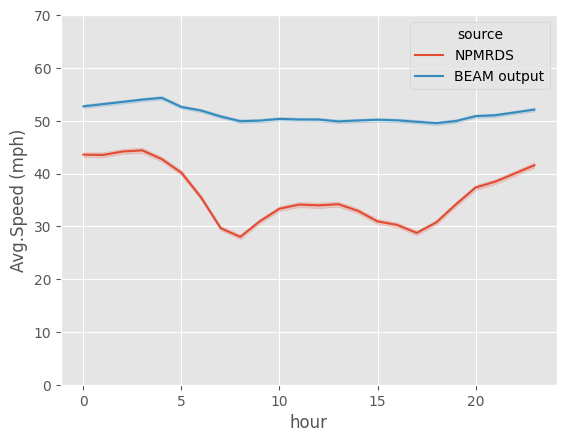

In [11]:
sns.lineplot(x = 'hour', y = 'Avg.Speed (mph)', hue = 'source', data = combined_data, ci = 95)
plt.ylim([0, 70])
plt.savefig(RUN_dir + 'output/BEAM_NPMRDS_screenline_speed_validation.png', dpi = 200)
plt.show()

# sns.lineplot(x = 'hour', y = 'Volume (veh/lane/hour)', hue = 'source', data = combined_data, ci = 95)
# # plt.ylim([0, 70])
# # plt.ylabel('volume (veh/lane/hour)')
# plt.savefig('plot/aus2017_BEAM_NPMRDS_screenline_volume_validation.png', dpi = 200)
# plt.show()

In [19]:
paired_data_for_comparison = pd.merge(SF_NPMRDS_data_hourly_speed, model_vmt_hour_data,
                                      on = ['Tmc', 'hour'], how = 'left')

paired_data_for_comparison = pd.merge(paired_data_for_comparison, tmc_county_lookup, 
                                      on = 'Tmc', how = 'left')
paired_data_for_comparison = paired_data_for_comparison.rename(columns = {'Avg.Speed (mph)_x': 'SF NPMRDS speed',
                                                                         'Avg.Speed (mph)_y': 'BEAM speed'})
paired_data_for_comparison = paired_data_for_comparison.dropna(subset = ['BEAM speed'])
# paired_data_for_comparison["KITS ID"] = paired_data_for_comparison["KITS ID"].astype(str)
paired_data_for_comparison.head(5)

Tmc  hour  SF NPMRDS speed source_x  Volume (veh/lane/hour)  \
0  105+04098     0            48.00   NPMRDS                    10.0   
1  105+04098     1            54.00   NPMRDS                     8.0   
2  105+04098     2            53.20   NPMRDS                     4.5   
3  105+04098     3            56.93   NPMRDS                     2.5   
4  105+04098     4            55.00   NPMRDS                     8.0   

            VMT  BEAM speed     source_y    NAME                  road_class  
0  31623.496129   54.999954  BEAM output  Sonoma  Freeway and major arterial  
1  25251.597656   54.999954  BEAM output  Sonoma  Freeway and major arterial  
2  14254.172882   54.999954  BEAM output  Sonoma  Freeway and major arterial  
3   7929.473656   54.999954  BEAM output  Sonoma  Freeway and major arterial  
4  25345.996151   54.999954  BEAM output  Sonoma  Freeway and major arterial

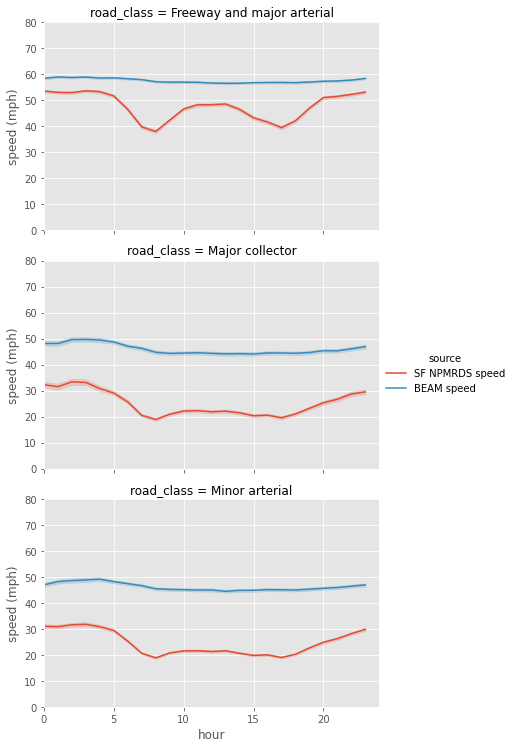

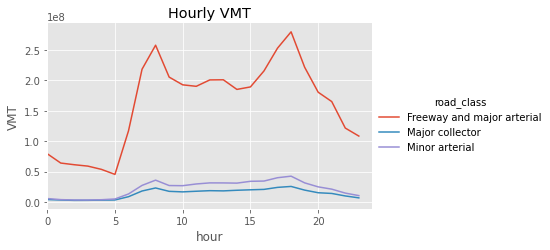

In [20]:
# summary plot
#     print(hour)

paired_data_melt = pd.melt(paired_data_for_comparison, 
                            id_vars = ['Tmc', 'hour', 'road_class'],
                            value_vars = ["SF NPMRDS speed", "BEAM speed"], 
                            var_name = 'source',
                            value_name = 'speed (mph)')
paired_data_melt = paired_data_melt.reset_index()
paired_data_melt = paired_data_melt.sort_values('road_class')
sns.relplot(data = paired_data_melt, x = "hour", y = "speed (mph)",
            hue = 'source', row = 'road_class',
            kind="line", height = 3.5, aspect = 1.6)
plt.xlim([0, 24])
plt.ylim([0, 80])
#     plt.title('County = ' + county + ', R2 = ' + str(r2_value))
plt.savefig('plot/' + scenario_name + '/paired_NPMRDS_hourly_speed.png', dpi = 200, bbox_inches = 'tight')
plt.show()

VMT_by_hour = paired_data_for_comparison.groupby(['hour', 'road_class'])[['VMT']].sum()
VMT_by_hour = VMT_by_hour.reset_index()
sns.relplot(data = VMT_by_hour, x = "hour", y = "VMT",
            hue = 'road_class',
            kind = "line", height = 3.5, aspect = 1.6)
plt.xlim([0, 24])
#     plt.ylim([0, 80])
plt.title('Hourly VMT')
plt.savefig('plot/' + scenario_name + '/NPMRDS_screenline_hourly_VMT.png', dpi = 200, bbox_inches = 'tight')
plt.show()    

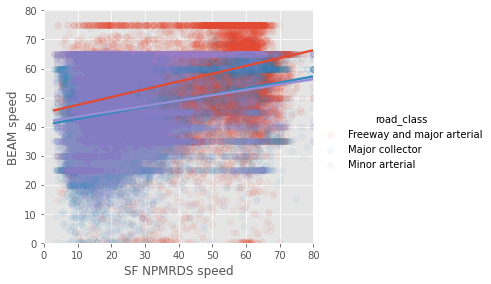

In [21]:
# sns.regplot(data=paired_data_for_comparison, x="Austin NPMRDS volume", y="BEAM volume",
#            scatter_kws={"color": "black", 'alpha':0.5})
# plt.xlim([0, 6000])
# plt.ylim([0, 6000])
# plt.savefig('plot/aus2017_paired_NPMRDS_screenline_volume_validation.png', dpi = 200)
# plt.show()
sns.lmplot(data = paired_data_for_comparison, x="SF NPMRDS speed", 
           y="BEAM speed",
            hue = 'road_class', height = 4, aspect = 1.2,
            scatter_kws={'alpha':0.05})
plt.xlim([0, 80])
plt.ylim([0, 80])
plt.savefig('plot/' + scenario_name + '/paired_NPMRDS_screenline_speed_validation.png', dpi = 200)
plt.show()

0 0.46


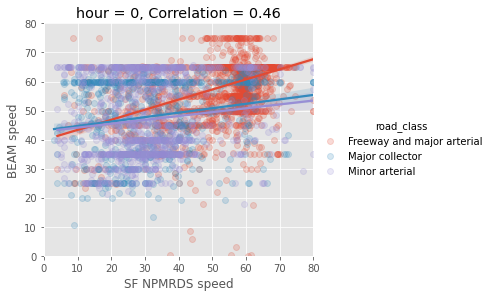

1 0.46


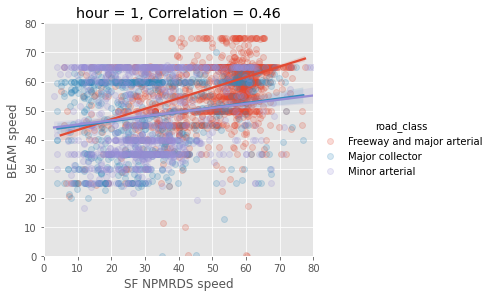

2 0.45


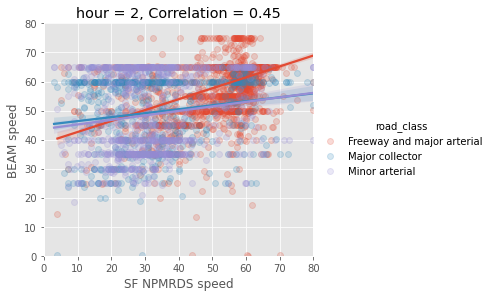

3 0.44


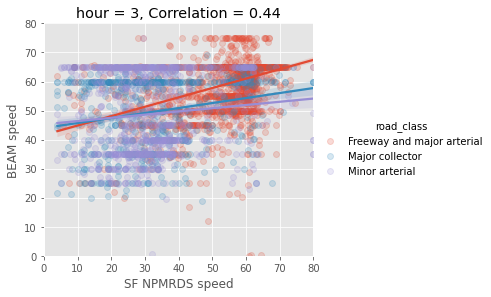

4 0.42


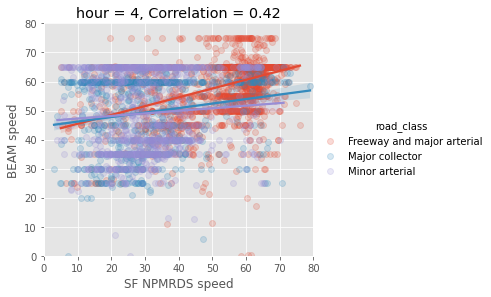

5 0.42


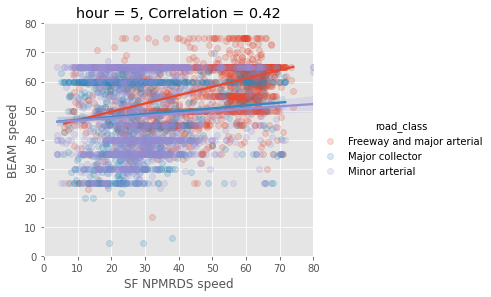

6 0.42


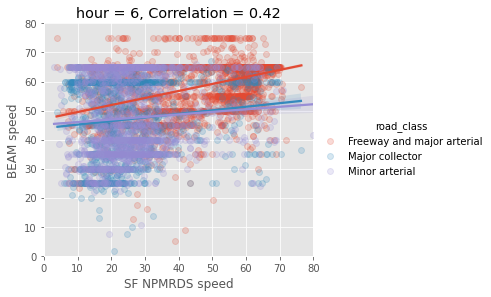

7 0.41


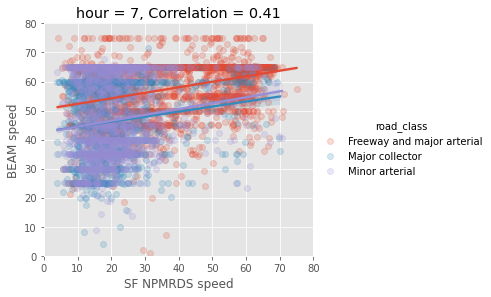

8 0.42


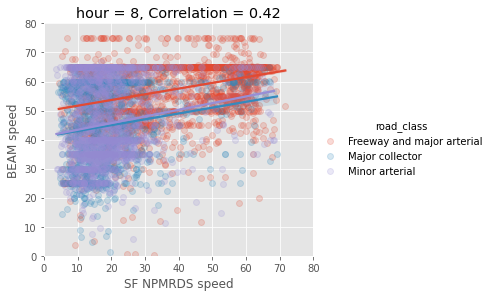

9 0.47


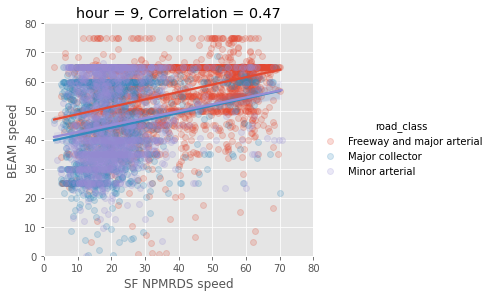

10 0.5


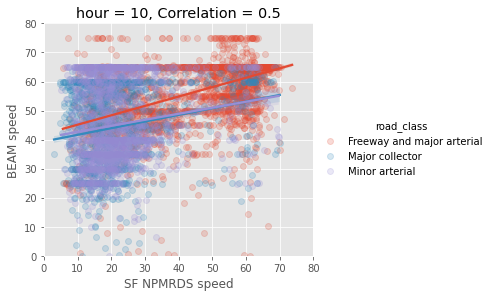

11 0.51


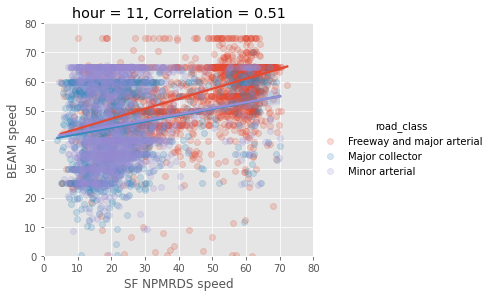

12 0.51


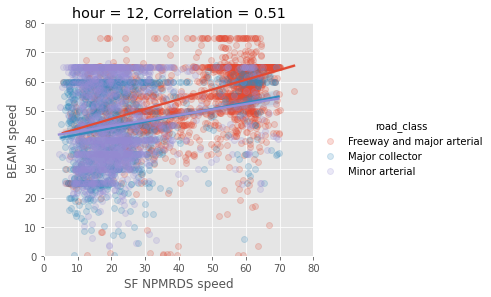

13 0.51


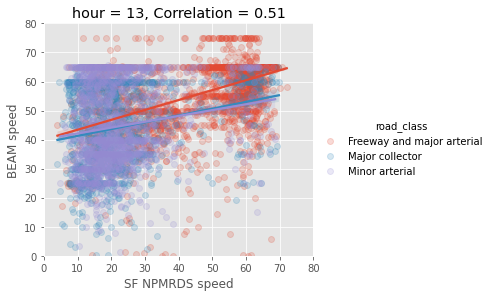

14 0.5


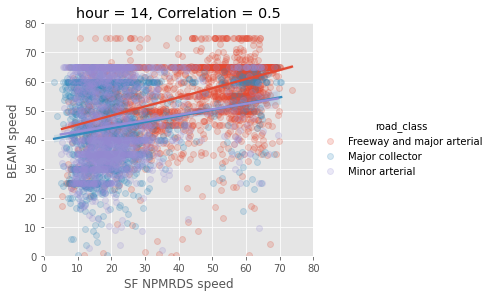

15 0.48


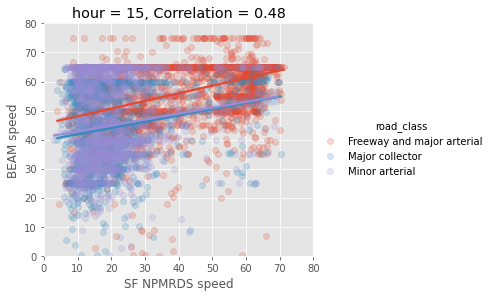

16 0.45


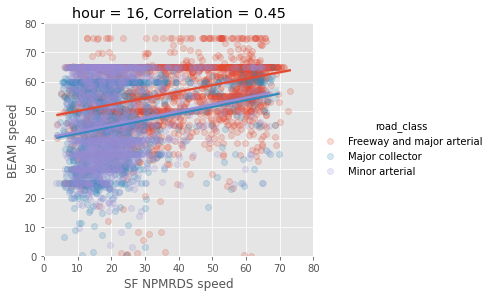

17 0.44


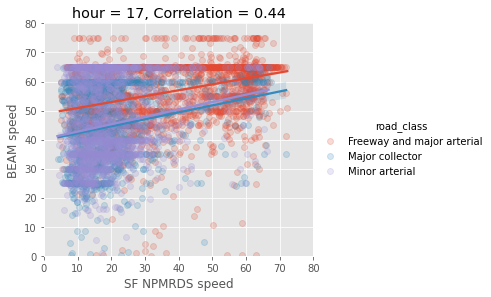

18 0.46


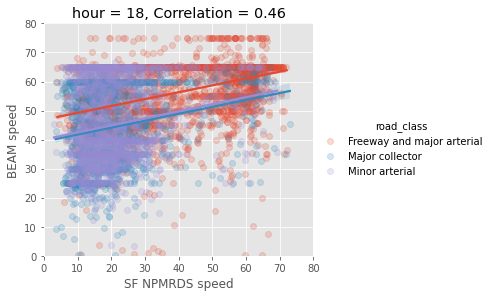

19 0.49


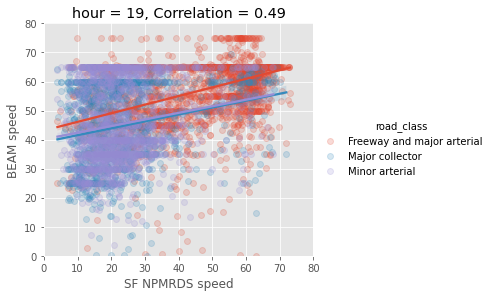

20 0.51


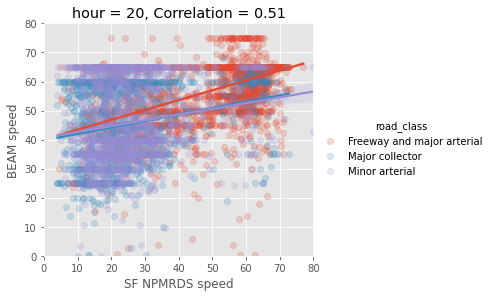

21 0.5


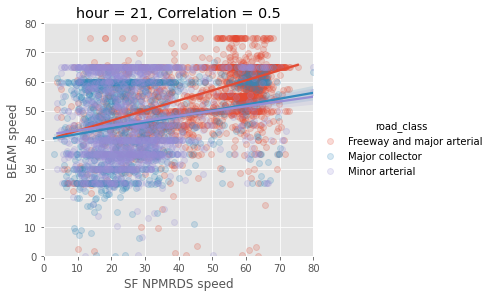

22 0.48


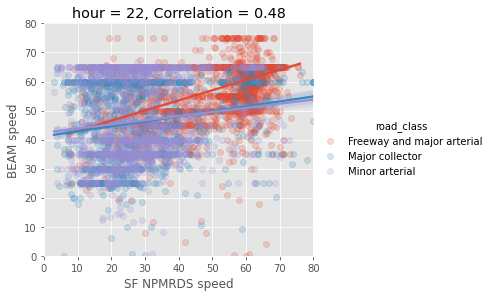

23 0.46


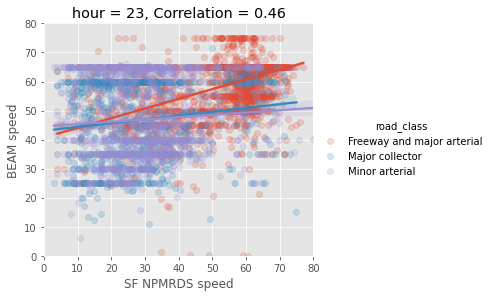

In [14]:
list_of_hours = paired_data_for_comparison.hour.unique()
list_of_counties = paired_data_for_comparison.NAME.unique()
for hour in list_of_hours:
#     print(hour)
    paired_data_by_hour = paired_data_for_comparison.loc[paired_data_for_comparison['hour'] == hour]
    corr, _ = pearsonr(paired_data_by_hour['SF NPMRDS speed'], paired_data_by_hour['BEAM speed'])
    corr = round(corr, 2)
    print(hour, corr)
    sns.lmplot(data = paired_data_by_hour, x="SF NPMRDS speed", y="BEAM speed",
               hue = 'road_class', height = 4, aspect = 1.2,
               scatter_kws={'alpha':0.2})
    plt.xlim([0, 80])
    plt.ylim([0, 80])
    plt.title('hour = ' + str(hour) + ', Correlation = ' + str(corr))
    plt.savefig('plot/' + scenario_name + '/paired_NPMRDS_screenline_speed_from_' + 
                str(hour) + '.png', dpi = 200, bbox_inches = 'tight')
    plt.show()
#     break

23 0.44


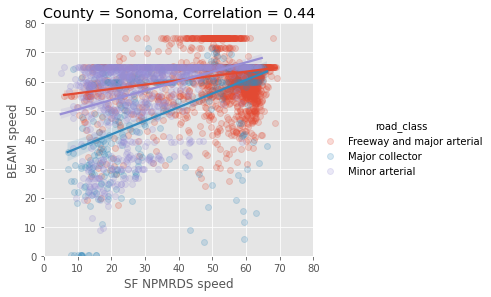

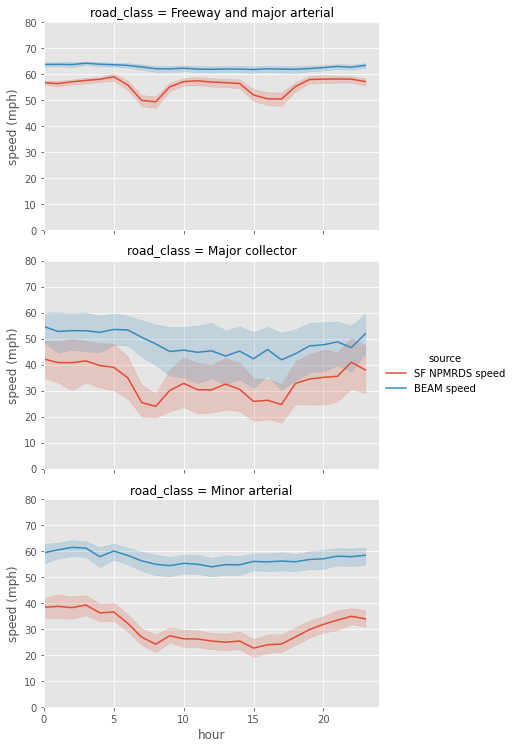

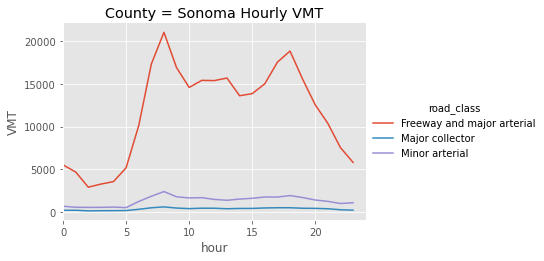

23 0.46


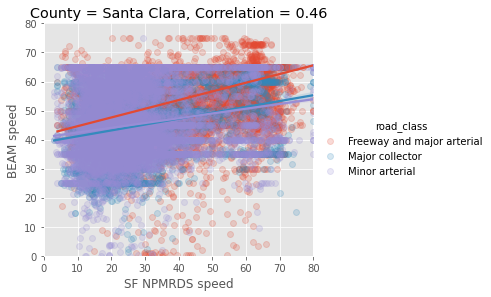

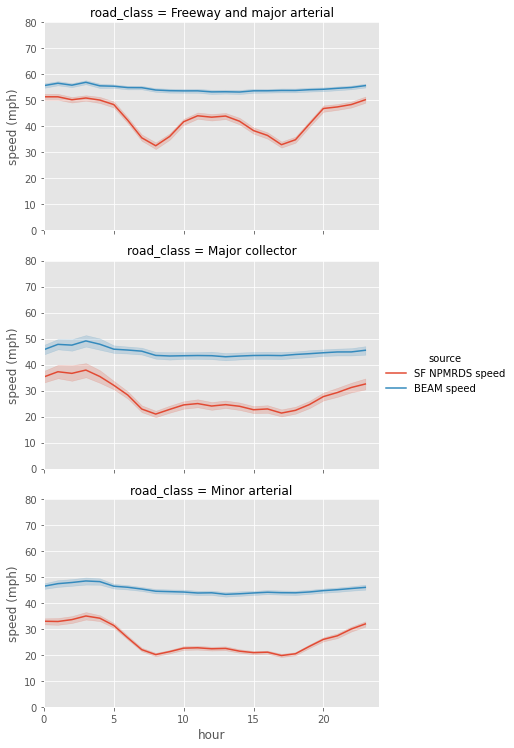

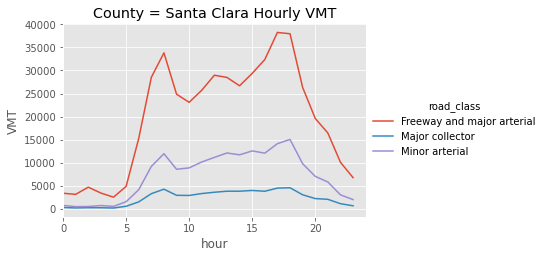

23 0.46


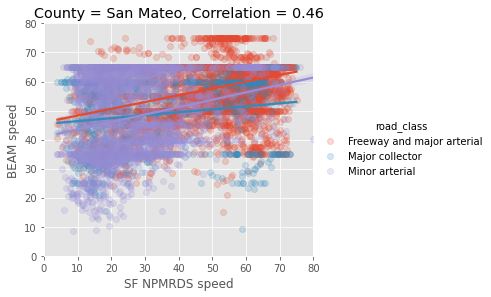

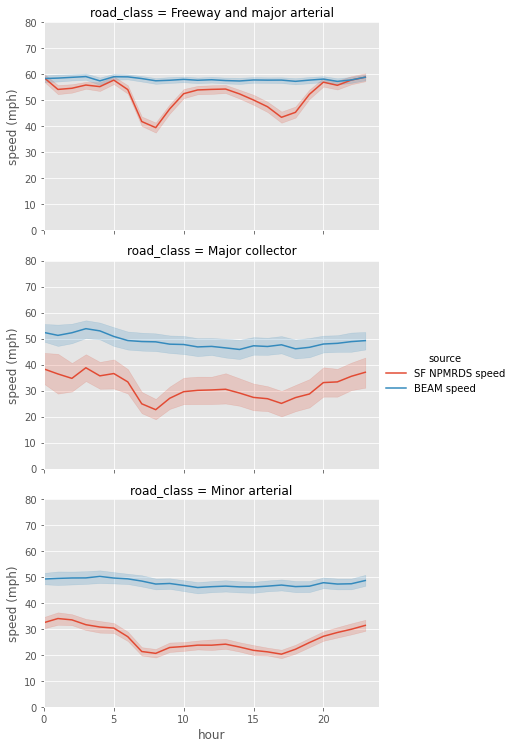

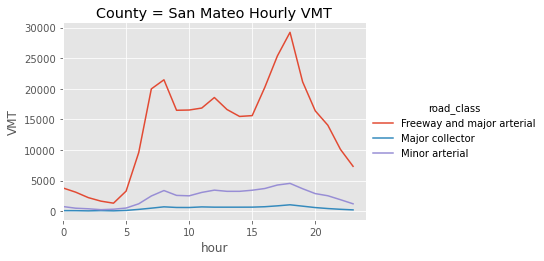

23 0.22


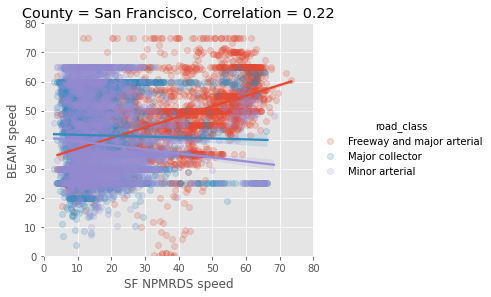

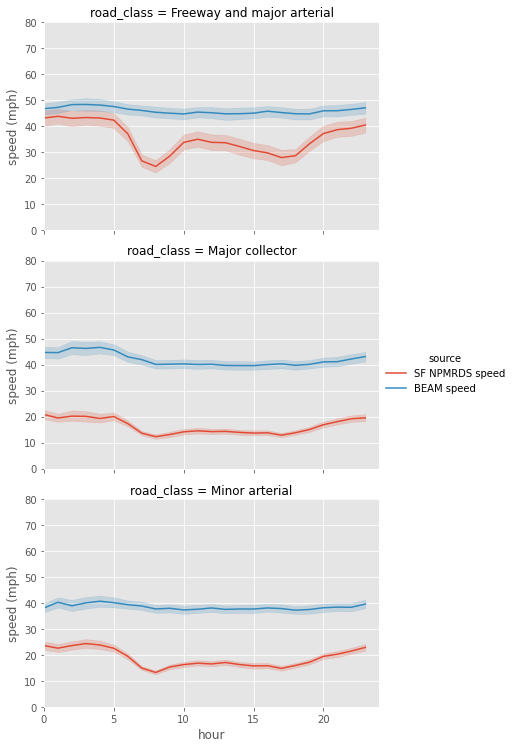

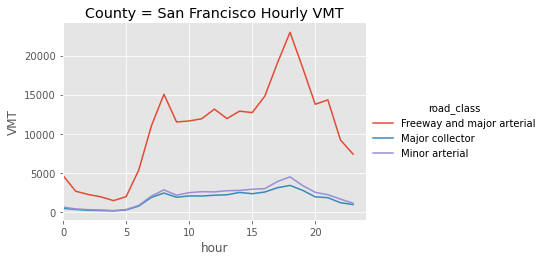

23 0.56


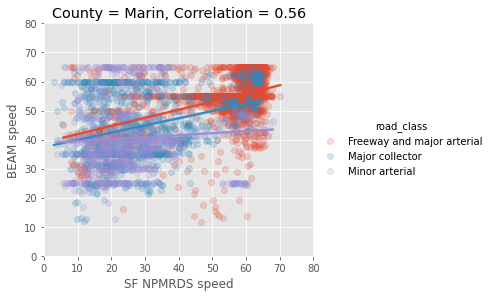

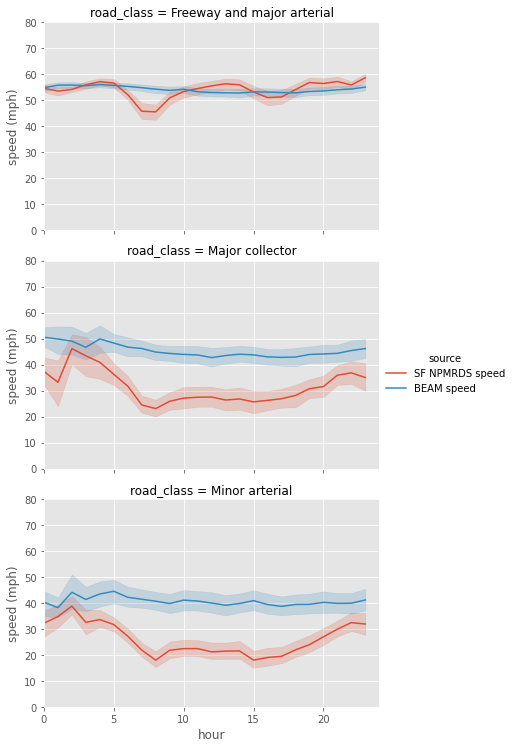

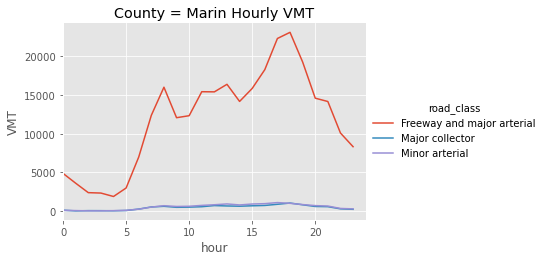

23 0.38


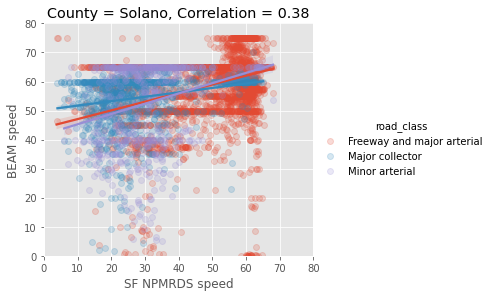

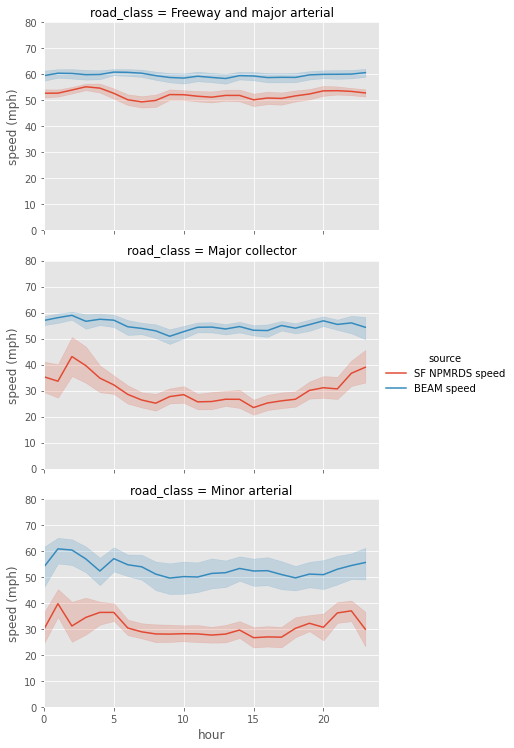

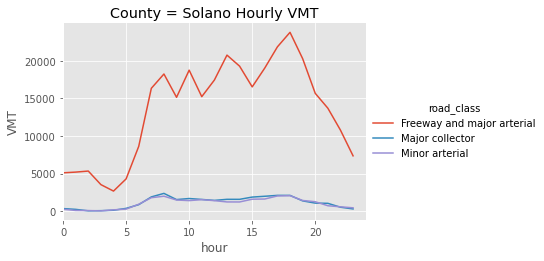

23 0.17


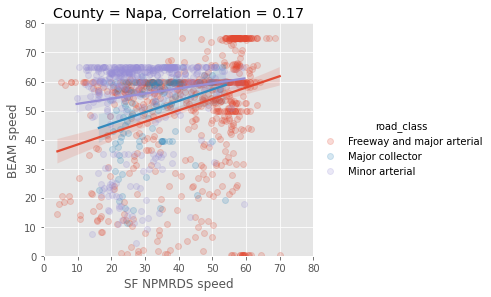

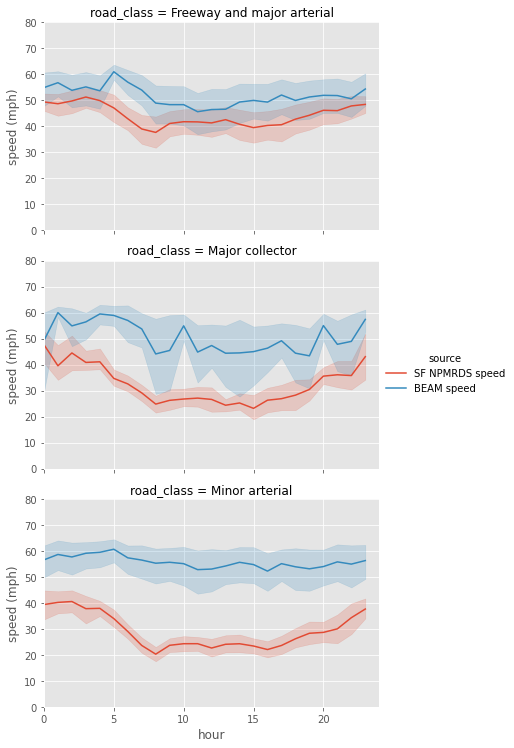

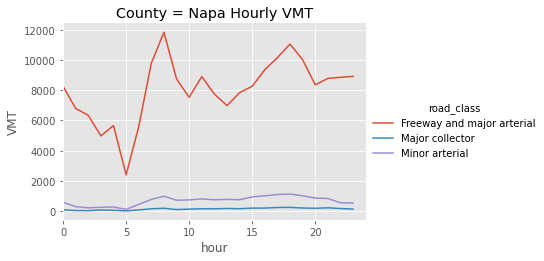

23 0.48


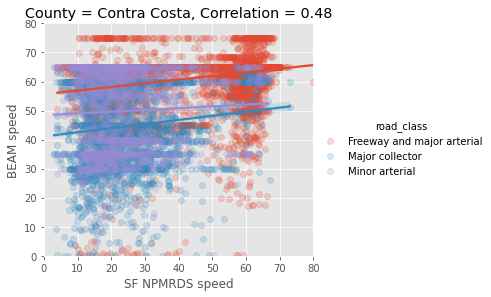

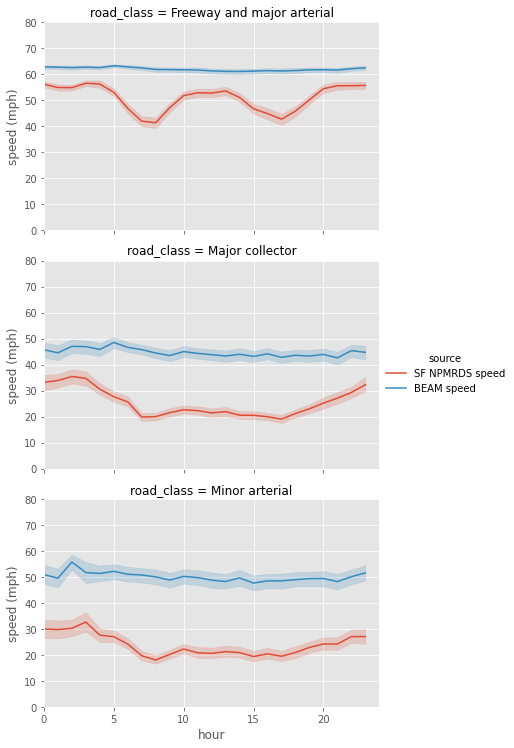

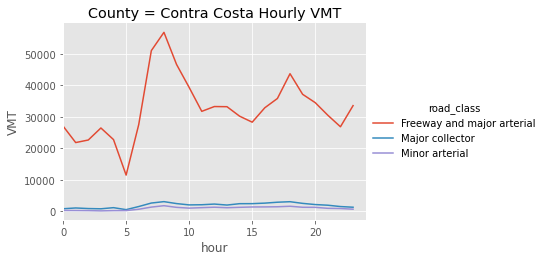

23 0.4


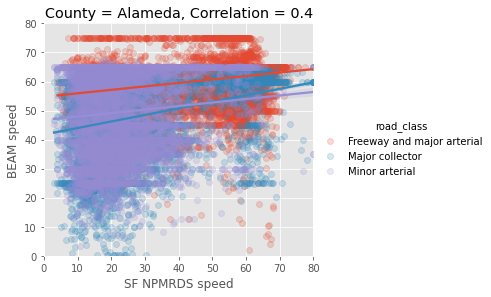

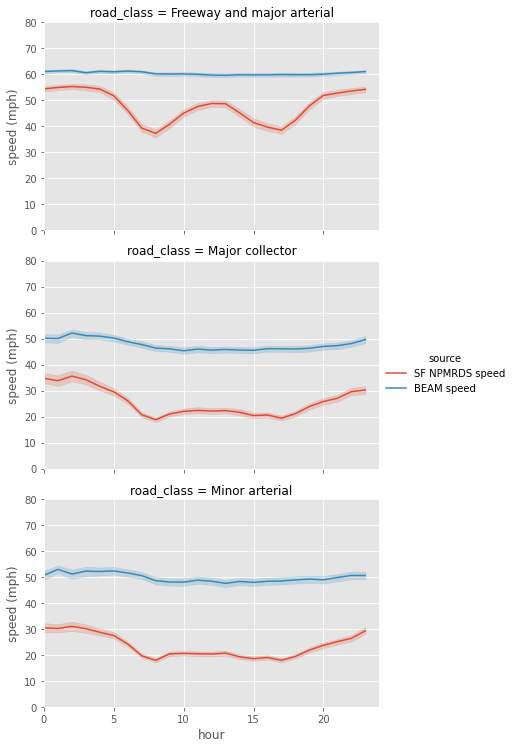

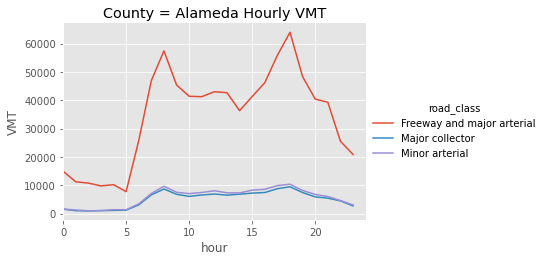

23 0.58


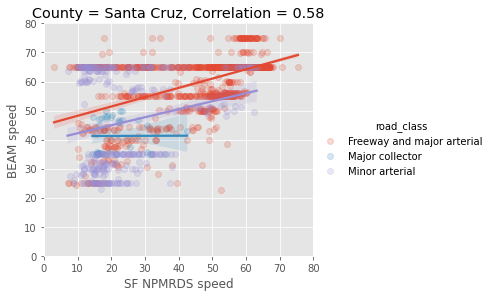

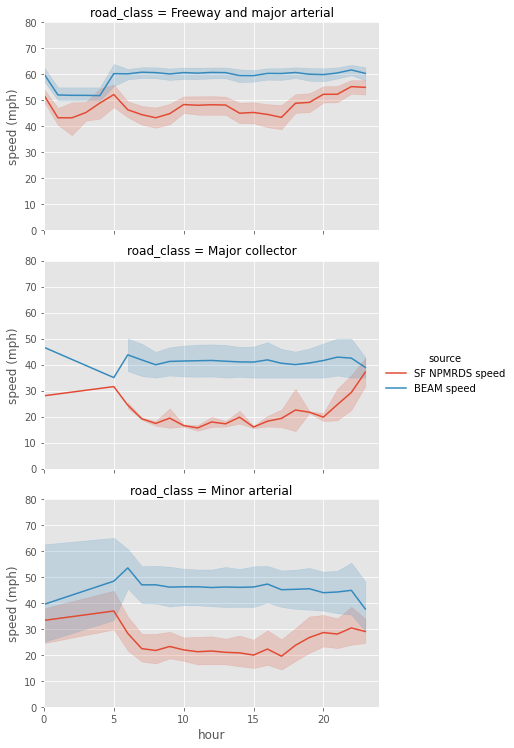

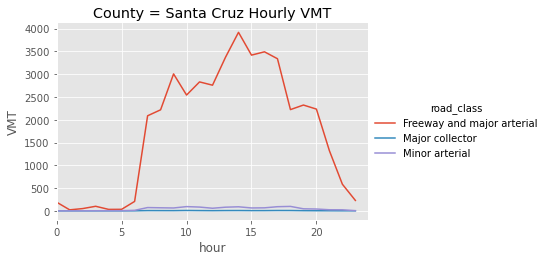

23 -0.05


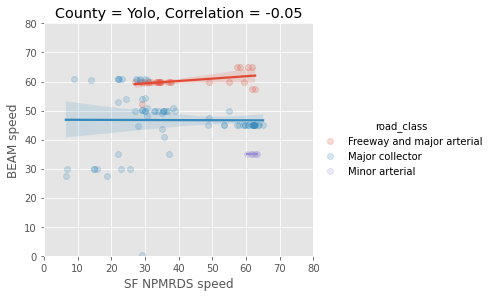

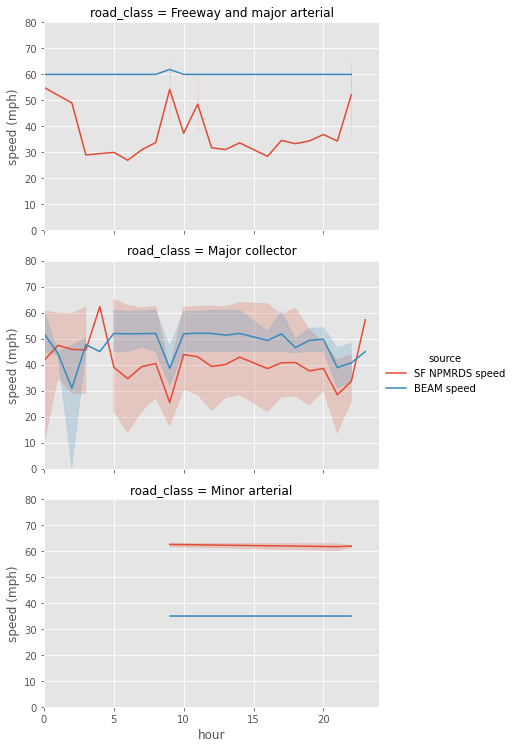

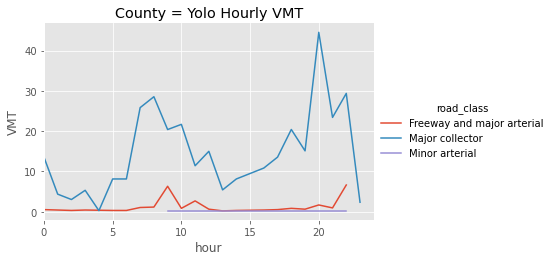

In [15]:
for county in list_of_counties:
#     print(hour)
    paired_data_by_county = paired_data_for_comparison.loc[paired_data_for_comparison['NAME'] == county]
    paired_data_by_county = paired_data_by_county.sort_values('road_class')
    corr, _ = pearsonr(paired_data_by_county['SF NPMRDS speed'], paired_data_by_county['BEAM speed'])
    corr = round(corr, 2)
    print(hour, corr)
    sns.lmplot(data = paired_data_by_county, x="SF NPMRDS speed", y="BEAM speed",
           hue = 'road_class', height = 4, aspect = 1.2, scatter_kws={'alpha':0.2})
    plt.xlim([0, 80])
    plt.ylim([0, 80])
    plt.title('County = ' + county + ', Correlation = ' + str(corr))
    plt.savefig('plot/' + scenario_name + '/paired_NPMRDS_screenline_speed_from_' + \
                county + '.png', dpi = 200, bbox_inches = 'tight')
    plt.show()
    
    paired_data_by_county_melt = pd.melt(paired_data_by_county, 
                                         id_vars = ['Tmc', 'hour', 'road_class'],
                                         value_vars = ["SF NPMRDS speed", "BEAM speed"], 
                                         var_name = 'source',
                                         value_name = 'speed (mph)')
    paired_data_by_county_melt = paired_data_by_county_melt.reset_index()
    paired_data_by_county_melt = paired_data_by_county_melt.sort_values('road_class')
    sns.relplot(data = paired_data_by_county_melt, x = "hour", y = "speed (mph)",
                hue = 'source', row = 'road_class',
                kind="line", height = 3.5, aspect = 1.6)
    plt.xlim([0, 24])
    plt.ylim([0, 80])
#     plt.title('County = ' + county + ', R2 = ' + str(r2_value))
    plt.savefig('plot/' + scenario_name + '/paired_NPMRDS_hourly_speed_from_' + \
                county + '.png', dpi = 200, bbox_inches = 'tight')
    plt.show()
    
    VMT_by_hour = paired_data_by_county.groupby(['hour', 'road_class'])[['VMT']].sum()
    VMT_by_hour = VMT_by_hour.reset_index()
    sns.relplot(data = VMT_by_hour, x = "hour", y = "VMT",
                hue = 'road_class',
                kind = "line", height = 3.5, aspect = 1.6)
    plt.xlim([0, 24])
#     plt.ylim([0, 80])
    plt.title('County = ' + county + ' Hourly VMT')
    plt.savefig('plot/' + scenario_name + '/NPMRDS_screenline_hourly_VMT_from_' + \
                county + '.png', dpi = 200, bbox_inches = 'tight')
    plt.show()    
#     break

In [15]:
paired_data_to_check = paired_data_for_comparison.loc[(paired_data_for_comparison['BEAM speed']<=5) & \
                                                      (paired_data_for_comparison['SF NPMRDS speed']>= 50)]
paired_data_to_check = pd.merge(paired_data_to_check,
                                model_vmt_24_hour_filtered,
                                on = ['Tmc', 'hour'], how = 'left')
paired_data_to_check = paired_data_to_check.loc[paired_data_to_check['speed (mph)'] <= 5]
paired_data_to_check.to_csv('sample output/SFB2014/selected_link_to_check.csv')

paired_data_to_check.head(5)



Tmc  hour  SF NPMRDS speed  Volume (veh/lane/hour)  BEAM speed  \
0  105+04206     0          57.8000                   250.0    0.576906   
1  105+04206     0          57.8000                   250.0    0.576906   
2  105+04206     1          56.9825                   249.0    0.575077   
3  105+04206     1          56.9825                   249.0    0.575077   
4  105+04206     2          59.9680                   250.0    0.577362   

    link  from    to   length  freespeed  ...  toNodeId GEOID   NAME  \
0  16095  9858  9857  109.536    29.0576  ...      9857  6041  Marin   
1  16094  9857  9858  109.536    29.0576  ...      9858  6041  Marin   
2  16095  9858  9857  109.536    29.0576  ...      9857  6041  Marin   
3  16094  9857  9858  109.536    29.0576  ...      9858  6041  Marin   
4  16095  9858  9857  109.536    29.0576  ...      9857  6041  Marin   

       NAMELSAD  CLASSFP  dist_to_tmc  hourly volume        VMT     speed  \
0  Marin County       H1          0.0          250.0  85.078117  0.257915   
1  Marin County       H1          0.0          250.0  85.078117  0.257884   
2  Marin County       H1          0.0          250.0  85.078117  0.257915   
3  Marin County       H1          0.0          248.0  84.397492  0.256242   
4  Marin County       H1          0.0          250.0  85.078117  0.258292   

   speed (mph)  
0     0.576941  
1     0.576871  
2     0.576941  
3     0.573198  
4     0.577784  

[5 rows x 34 columns]

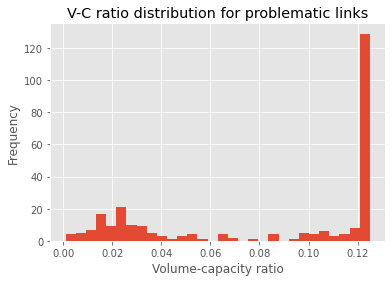

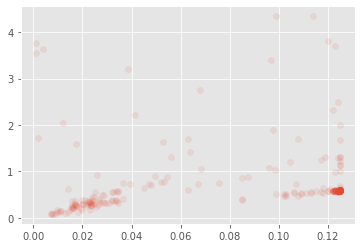

In [19]:
paired_data_to_check.loc[:, 'capacity per lane'] = paired_data_to_check.loc[:, 'capacity'] / paired_data_to_check.loc[:, 'numberOfLanes']
paired_data_to_check.loc[:, 'V-C Ratio'] = paired_data_to_check.loc[:, 'hourly volume']/paired_data_to_check.loc[:, 'capacity per lane']
paired_data_to_check.loc[:, 'V-C Ratio'].hist(bins = 30)
plt.xlabel('Volume-capacity ratio')
plt.ylabel('Frequency')
plt.title('V-C ratio distribution for problematic links')
plt.savefig('plot/vc_ratio_for_problematic_links.png', dpi = 200)
plt.show()
plt.scatter(x='V-C Ratio', y = 'speed (mph)', data = paired_data_to_check, alpha = 0.1)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


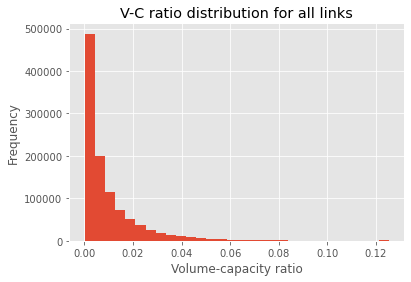

In [21]:
# filter network congested part
model_vmt_24_hour_filtered.loc[:, 'capacity per lane'] = model_vmt_24_hour_filtered.loc[:, 'capacity'] / model_vmt_24_hour_filtered.loc[:, 'numberOfLanes']
model_vmt_24_hour_filtered.loc[:, 'V-C Ratio'] = model_vmt_24_hour_filtered.loc[:, 'hourly volume'] / model_vmt_24_hour_filtered.loc[:, 'capacity per lane']
model_vmt_24_hour_filtered.loc[:, 'V-C Ratio'].hist(bins = 30)
plt.xlabel('Volume-capacity ratio')
plt.ylabel('Frequency')
plt.title('V-C ratio distribution for all links')
plt.savefig('plot/vc_ratio_for_all_sf_links.png', dpi = 200)
plt.show()                               

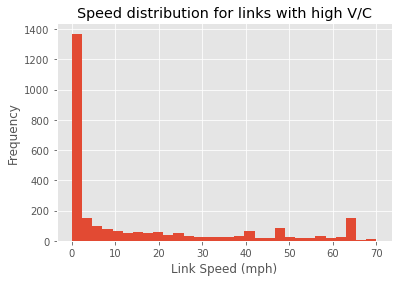

In [23]:
model_vmt_24_hour_congested = model_vmt_24_hour_filtered.loc[model_vmt_24_hour_filtered['V-C Ratio']>= 0.1]
model_vmt_24_hour_congested.loc[:, 'speed (mph)'].hist(bins = 30)
plt.xlabel('Link Speed (mph)')
plt.ylabel('Frequency')
plt.title('Speed distribution for links with high V/C')
plt.savefig('plot/speed_for_congested_sf_links.png', dpi = 200)
plt.show() 

model_vmt_24_hour_congested.to_csv('sample output/SFB2014/links_with_high_vc.csv')

In [15]:
model_network_with_observed_traffic = pd.merge(model_network, SF_NPMRDS_data_hourly_speed, 
                                               on = 'Tmc', how = 'left')
observed_speed_limit = model_network_with_observed_traffic.groupby(['attributeOrigType'])[['Avg.Speed (mph)']].quantile([0.95, 0.99, 1])
# observed_speed_limit.columns = ['speed limit (95 percentile)', 'speed limit (99 percentile)', 'speed limit (max)']
observed_speed_limit = observed_speed_limit.reset_index()

print(observed_speed_limit)

modeled_speed_limit = model_network.groupby(['attributeOrigType'])[['linkFreeSpeed']].max()
modeled_speed_limit = modeled_speed_limit.reset_index()

modeled_speed_limit.loc[:, 'linkFreeSpeed'] *= 2.23694

print(modeled_speed_limit)

observed_speed_limit = pd.merge(observed_speed_limit, modeled_speed_limit,
                                on = 'attributeOrigType', how = 'left')
observed_speed_limit.to_csv('sample output/SFB2021V2/observed_speed_limit.csv', index = False)
# model_network_with_observed_traffic.loc[:, 'Volume(veh/hour)'] = model_network_with_observed_traffic.loc[:, 'Volume (veh/lane/hour)'] * \
# model_network_with_observed_traffic.loc[:, 'numberOfLanes']
# list_of_out_var = ['linkId', 'linkLength', 'linkFreeSpeed', 'linkCapacity', 
#                    'numberOfLanes', 'linkModes', 'attributeOrigId',
#                    'attributeOrigType', 'fromNodeId', 'toNodeId', 'name',
#                    'hour', 'Avg.Speed (mph)', 'Volume(veh/hour)', 'source']
# model_network_with_observed_traffic = model_network_with_observed_traffic.loc[:, list_of_out_var]
# model_network_with_observed_traffic = model_network_with_observed_traffic.dropna()
# model_network_with_observed_traffic.to_csv('sample output/' + scenario_name + '/observed_speed_limit.csv', index = False)
# model_network_with_observed_traffic.head(5)

   attributeOrigType  level_1  Avg.Speed (mph)
0           motorway     0.95        65.838000
1           motorway     0.99        69.681220
2           motorway     1.00        80.000000
3      motorway_link     0.95        65.648000
4      motorway_link     0.99        69.376000
5      motorway_link     1.00        80.000000
6            primary     0.95        46.305000
7            primary     0.99        62.668000
8            primary     1.00        80.000000
9       primary_link     0.95        42.196875
10      primary_link     0.99        53.336433
11      primary_link     1.00        80.000000
12         secondary     0.95        59.989100
13         secondary     0.99        65.750000
14         secondary     1.00        80.000000
15    secondary_link     0.95        50.304375
16    secondary_link     0.99        65.208000
17    secondary_link     1.00        80.000000
18             trunk     0.95        55.010000
19             trunk     0.99        62.910000
20           